In [ ]:
# No Colab alterar o tipo de ambiente de execução para a versão 3.11 do python para funcionar o pycaret (atualmente o Colab utiliza a versão 3.12)
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 5.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 150.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 172.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dados climáticos globais ERA5 da localização geográfica da Estação MONTE ALEGRE**

*   **Nome:** ERA5 - Monte Alegre
*   **Latitude:** 22°11'19" S
*   **Longitude:** 47°57'12" O


## 1. Coleta de Dados

Esse dataset possui as leituras automáticas realizadas no período de **01/01/2015 à 17/10/2025**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Caminho para o arquivo no Google Drive
caminho_arquivo = "/content/drive/MyDrive/datasets/serie_tp_lat-22.1886_lon-47.9533_monte_alegre_era5_2015a2025"

# Lendo o conjunto de dados
df = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)

df

In [ ]:
# Criando variáveis de data, precipitação e temperatura
variavel_data = 'data_hora_leitura'
variavel_precipitacao = 'precipitacao_total'
variavel_temperatura = 'temperatura_do_ar'

# Converte a coluna de datas para o tipo datetime
df[variavel_data] = pd.to_datetime(df[variavel_data], errors="coerce")

# Ordena por data
df = df.sort_values(variavel_data)

## 2. Dicionário e estrutura do conjunto de dados

Nesse banco de dados existem **13 variáveis** sendo uma do tipo datetime e 12 numéricas, com **589200 leituras**, nas quais são:

* **id_da_estacao:** identificação da leitura
* **data_hora_leitura:** data e hora da leitura
* **temperatura_painel:** temperatura no painel
* **pressao_media:** pressão média em milibar (mbar)
* **precipitacao_total:** precipitação em milímetros (mm)
* **temperatura_do_ar:** temperatura do ar em graus celsius (C)
* **umidade_relativa:** umidade relativa em porcentagem (%)
* **radiacao_media:** radiação média em kW/m^2
* **fluxo_radiacao_total:** fluxo da radiação em MJ/m^2
* **velocidade_do_vento:** velocidade do vento em metros/segundo
* **direcao_do_vento:** direção do vento em graus
* **bateria:** Voltagem da bateria em volts (V)
* **precipitacao_nao_corrigida**

**Importante:** há períodos com leituras diárias e períodos com leituras de 10 em 10 minutos.

## 3. Análise descritiva univariada das variáveis

In [ ]:
# Dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{df.shape[1]} \Leituras: \t{df.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	13 \Leituras: 	748302



In [ ]:
# Tipos de cada variável
df.dtypes

,0
id_da_estacao,float64
data_hora_leitura,datetime64[ns]
temperatura_painel,float64
pressao_media,float64
precipitacao_total,float64
temperatura_do_ar,float64
umidade_relativa,float64
radiacao_media,float64
fluxo_radiacao_total,float64
velocidade_do_vento,float64


In [ ]:
# Dados ausentes
df.isnull().sum()

,0
id_da_estacao,513115
data_hora_leitura,0
temperatura_painel,38094
pressao_media,38095
precipitacao_total,404
temperatura_do_ar,529
umidade_relativa,530
radiacao_media,7
fluxo_radiacao_total,7
velocidade_do_vento,7


In [ ]:
df.describe()

,id_da_estacao,data_hora_leitura,temperatura_painel,pressao_media,precipitacao_total,temperatura_do_ar,umidade_relativa,radiacao_media,fluxo_radiacao_total,velocidade_do_vento,direcao_do_vento,bateria,precipitacao_nao_corrigida
count,235187.000000,748302,710208.000000,710207.000000,747898.000000,747773.000000,747772.000000,748295.000000,748295.000000,748295.000000,748295.000000,748294.000000,97288.000000
mean,51410.942267,2020-10-09 03:24:01.566104576,22.203507,930.975624,0.031624,20.082910,71.221580,0.205385,0.250508,1.534050,170.277623,12.727531,0.072638
min,0.000000,2011-06-21 16:00:00,-2.402000,402.100000,0.000000,-104.400000,-85.600000,0.000000,0.000000,0.000000,0.000000,8.870000,0.000000
25%,19602.000000,2018-09-05 04:52:30,17.540000,929.000000,0.000000,17.570000,55.440000,0.000000,0.000000,0.557000,79.150000,12.450000,0.000000
50%,40053.000000,2021-03-19 11:30:00,21.220000,931.000000,0.000000,20.990000,77.120000,0.002000,0.001787,1.280000,160.600000,12.620000,0.000000
75%,80080.500000,2023-03-23 20:47:30,27.470000,933.000000,0.000000,25.150000,91.900000,0.377000,0.243066,2.301000,268.300000,13.100000,0.000000
max,138913.000000,2025-09-01 11:50:00,42.670000,943.000000,47.400000,66.660000,150.500000,1.434000,59.700000,9.840000,691.200000,13.940000,47.400000
std,39021.270698,NaN,6.903889,4.638414,0.401709,10.333988,25.591746,0.296500,2.438477,1.211119,108.967796,0.414409,0.726413


In [ ]:
# Removendo variáveis desnecessárias
df.drop(['id_da_estacao', 'precipitacao_nao_corrigida', 'bateria'], axis=1, inplace=True)

In [ ]:
# Agregação dos valores de 10 em 10 minutos para diário
df_10min = df.set_index(variavel_data).resample('10min').mean()

df_diario = df_10min.resample('D').agg({
    'temperatura_painel': 'mean',
    'pressao_media': 'mean',
    'precipitacao_total': 'sum',
    'temperatura_do_ar': 'mean',
    'umidade_relativa': 'mean',
    'radiacao_media': 'mean',
    'fluxo_radiacao_total': 'mean',
    'velocidade_do_vento': 'mean',
    'direcao_do_vento': 'mean',
})

In [ ]:
# Define a precipitação como NaN se a temperatura também for NaN, ou seja, não houve leitura naquele dia
df_diario.loc[df_diario[variavel_temperatura].isna(), variavel_precipitacao] = np.nan

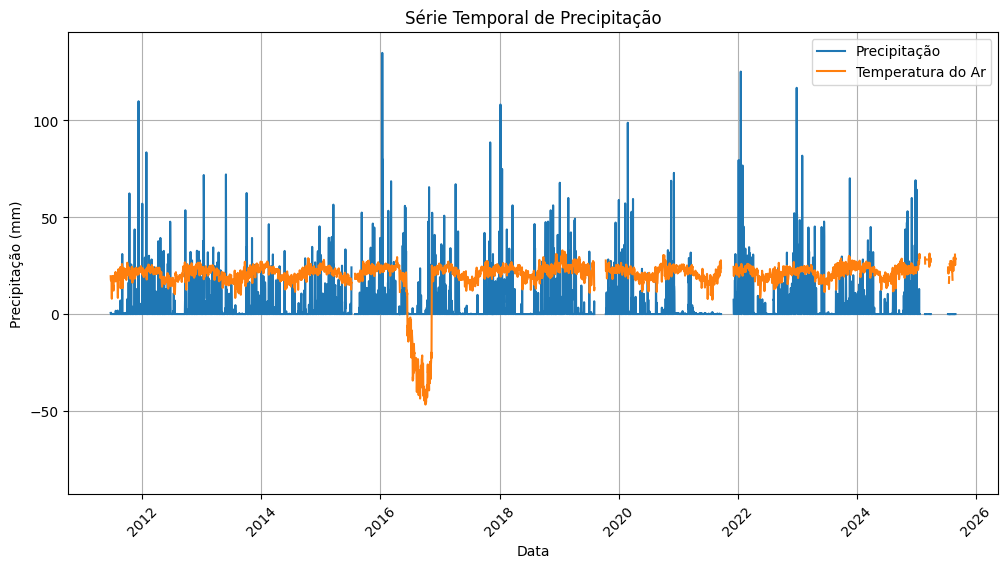

In [ ]:
# Gráfico com leituras diárias de precipitação e temperatura
plt.figure(figsize=(12,6))
plt.plot(df_diario.index, df_diario[variavel_precipitacao], label='Precipitação')
plt.plot(df_diario.index, df_diario[variavel_temperatura], label='Temperatura do Ar')

# Adiciona título e rótulos
plt.title('Série Temporal de Precipitação')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

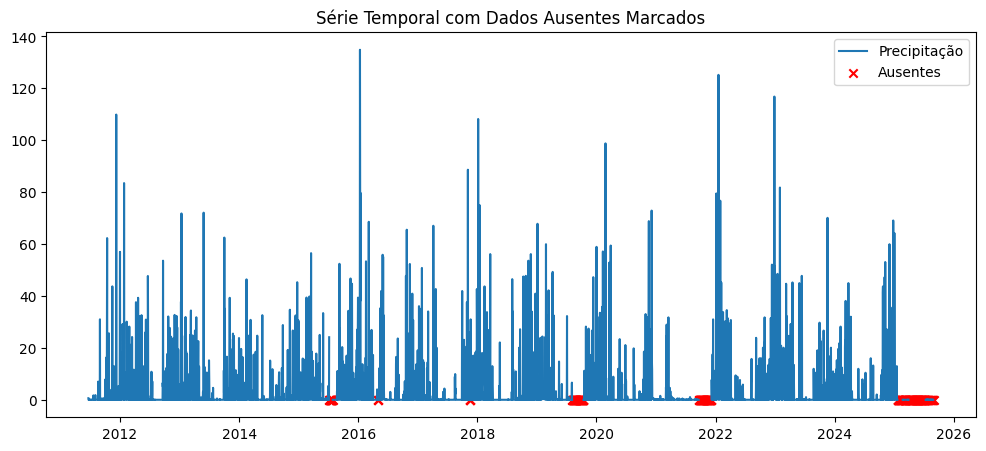

In [ ]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(df_diario.index, df_diario[variavel_precipitacao], label='Precipitação')
plt.scatter(df_diario.index[df_diario[variavel_precipitacao].isna()], [0]*df_diario[variavel_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal com Dados Ausentes Marcados')
plt.show()



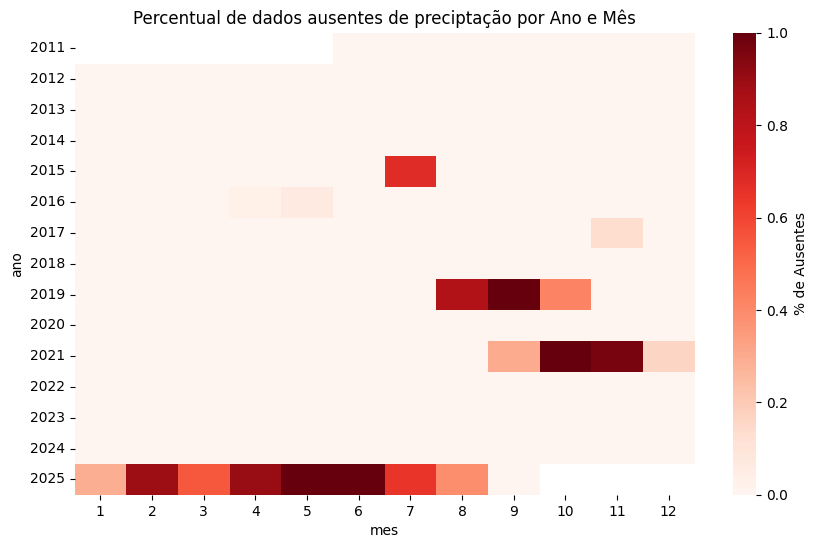

In [ ]:
# Cria tabela ano x mês, contando valores ausentes
df_diario['ano'] = df_diario.index.year
df_diario['mes'] = df_diario.index.month
pivot = df_diario.pivot_table(values=variavel_precipitacao, index='ano', columns='mes',
                       aggfunc=lambda x: x.isna().mean())

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', cbar_kws={'label': '% de Ausentes'})
plt.title('Percentual de dados ausentes de preciptação por Ano e Mês')
plt.show()


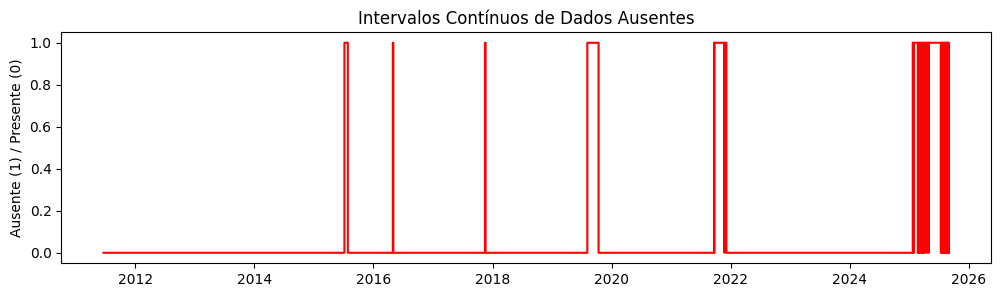

In [ ]:
is_na = df_diario[variavel_precipitacao].isna()
plt.figure(figsize=(12,3))
plt.plot(df_diario.index, is_na, drawstyle='steps-mid', color='red')
plt.title('Intervalos Contínuos de Dados Ausentes')
plt.ylabel('Ausente (1) / Presente (0)')
plt.show()


In [ ]:
# Agregando a precipitação diária para a soma Mensal ('MS' - Month Start)
# A função 'sum()' é usada para somar a precipitação dentro de cada mês
df_mensal = df_diario[variavel_precipitacao].resample('MS').sum().to_frame()

df_mensal

,precipitacao_total
data_hora_leitura,
2011-06-01,1.0
2011-07-01,1.9
2011-08-01,41.5
2011-09-01,1.3
2011-10-01,158.1
...,...
2025-05-01,0.0
2025-06-01,0.0
2025-07-01,0.0


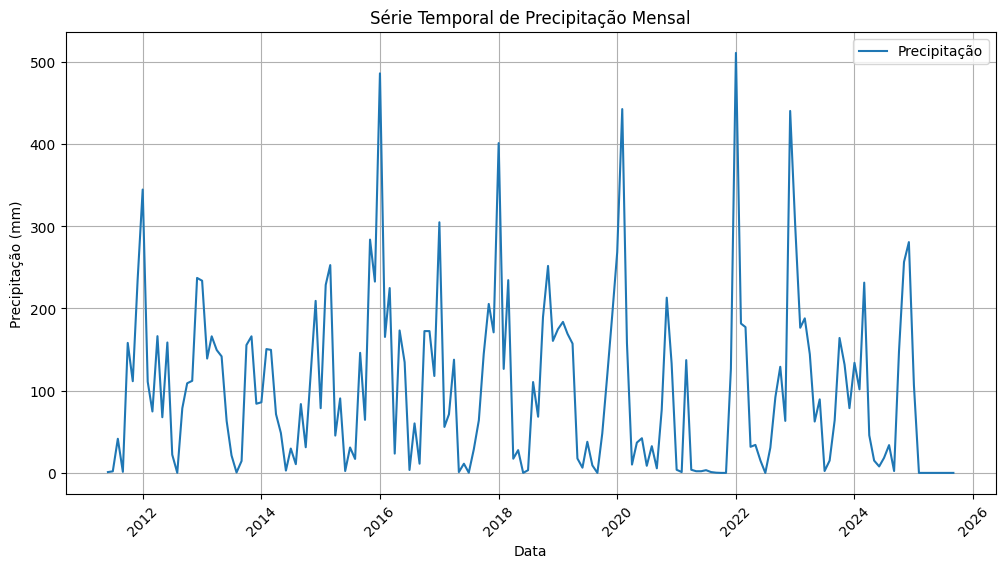

In [ ]:
# Cria o gráfico de precipitação mensal
plt.figure(figsize=(12,6))
plt.plot(df_mensal.index, df_mensal[variavel_precipitacao], label="Precipitação")

# Adiciona título e rótulos
plt.title("Série Temporal de Precipitação Mensal")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

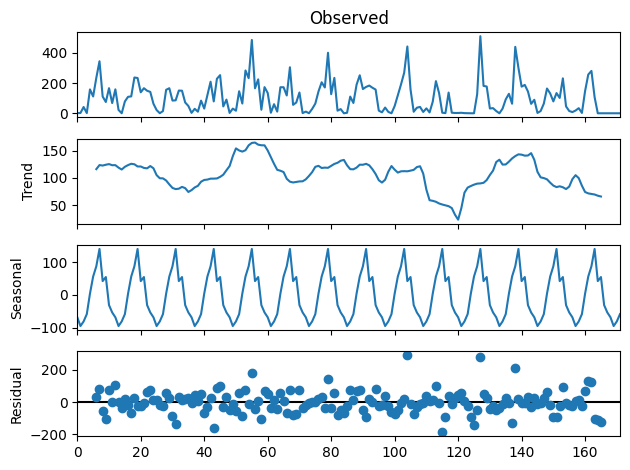

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

precipitacao_total = np.array(df_mensal[variavel_precipitacao])

result = seasonal_decompose(precipitacao_total, model='additive', period=12)
result.plot()

plt.show()

## 3. Previsão Futura para 1 ano

In [ ]:
from pycaret.time_series import setup, compare_models, finalize_model, predict_model

# --- Configuração do PyCaret ---
# Inicializando o ambiente com os dados Mensais
# fh=12: Horizon of the forecast (12 meses, equivalente a um ano)
print("\nIniciando a Configuração do PyCaret (Dados Mensais)...")
s_mensal = setup(
    data = df_mensal,
    target = variavel_precipitacao,
    fh = 12,
    session_id = 456,
    #ignore_prep_pipeline = True,
    #verbose = False
)

# --- Comparação e Seleção do Melhor Modelo (Mensal) ---
print("Comparando Modelos (Mensal)...")
# Usando 'seasonal_decompose' para tentar melhorar a decomposição sazonal
best_model_mensal = compare_models(
    fold = 3,
    round = 4, # Maior precisão na comparação
    #verbose = False
)

print(f"\n--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: {type(best_model_mensal).__name__} ---")

# --- Treinamento e Finalização do Melhor Modelo ---
final_model_mensal = finalize_model(best_model_mensal)

# --- Previsão Futura (Forecast) ---
# Gerando a previsão para 12 meses
predictions_mensal = predict_model(final_model_mensal)




Iniciando a Configuração do PyCaret (Dados Mensais)...


,Description,Value
0,session_id,456
1,Target,precipitacao_total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(172, 1)"
5,Transformed data shape,"(172, 1)"
6,Transformed train set shape,"(160, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Comparando Modelos (Mensal)...


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7808,0.7695,58.0422,84.1072,23748608876636236.0000,0.7165,0.3883,0.5000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7808,0.7696,58.0439,84.1103,23761958986328676.0000,0.7165,0.3883,0.2533
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7808,0.7695,58.0422,84.1072,23748631529437236.0000,0.7165,0.3883,0.2600
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7808,0.7696,58.0457,84.1131,23772806086343948.0000,0.7165,0.3883,0.3133
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7808,0.7696,58.0457,84.1131,23772839506209156.0000,0.7165,0.3883,0.3733
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.7915,0.7675,58.7889,83.6613,32939471026320912.0000,0.7193,0.4037,0.2533
ets,ETS,0.7939,0.7937,58.9439,86.4022,32765400958304936.0000,0.7655,0.3533,0.1833
exp_smooth,Exponential Smoothing,0.7939,0.7936,58.9461,86.3992,32741833176969064.0000,0.7653,0.3533,1.1767
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7973,0.7752,59.2659,84.6550,25053955147243612.0000,0.7790,0.3787,0.2600
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8032,0.8038,59.6411,87.5329,33122788100084244.0000,0.7066,0.3369,0.2500


Processing:   0%|          | 0/117 [00:00<?, ?it/s]


--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: BaseCdsDtForecaster ---


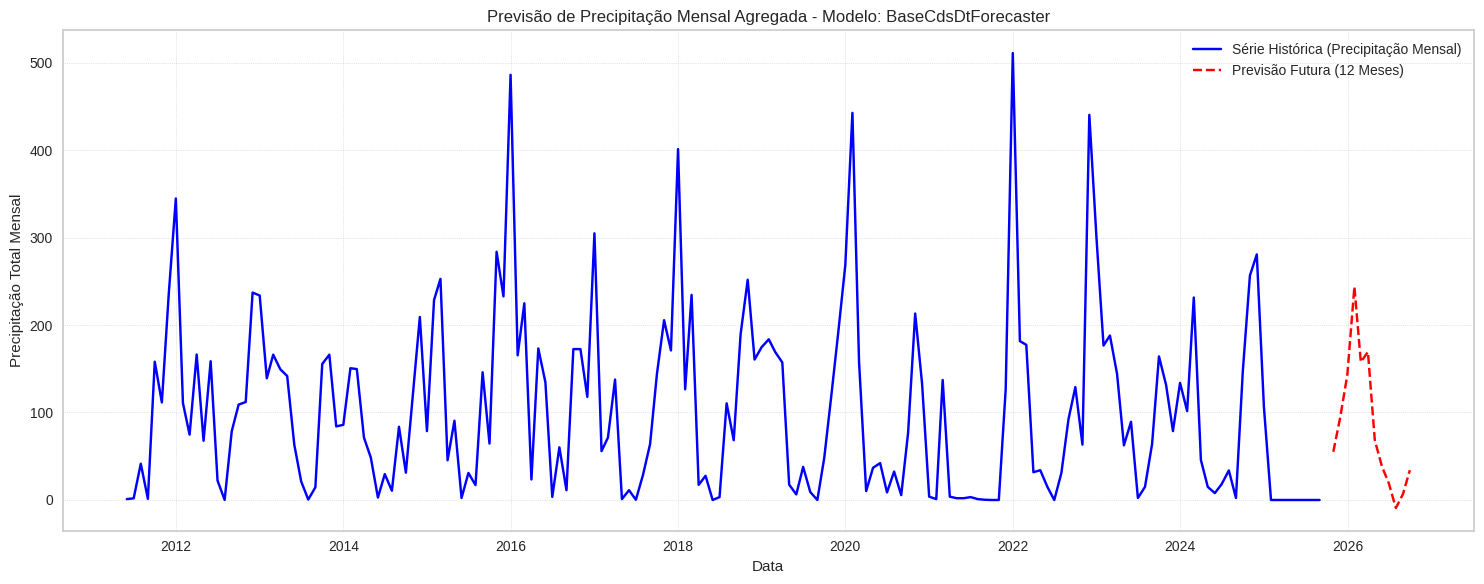


Valores da previsão (12 meses):
           y_pred
2025-10   55.0976
2025-11   94.3205
2025-12  142.7297
2026-01  243.7331
2026-02  157.6916
2026-03  169.2370
2026-04   68.3400
2026-05   38.4717
2026-06   19.2467
2026-07   -9.1240
2026-08    6.7555
2026-09   34.1318


In [ ]:
# --- Visualização ---
# Gerando o gráfico de previsão Mensal
plt.figure(figsize=(15, 6))

# Série histórica (Dados Reais Mensais)
plt.plot(df_mensal.index, df_mensal[variavel_precipitacao], label='Série Histórica (Precipitação Mensal)', color='blue')

# Previsão futura Mensal
plt.plot(predictions_mensal.index, predictions_mensal['y_pred'], label='Previsão Futura (12 Meses)', color='red', linestyle='--')

# Configurações do Gráfico
plt.title(f'Previsão de Precipitação Mensal Agregada - Modelo: {type(best_model_mensal).__name__}')
plt.xlabel('Data')
plt.ylabel('Precipitação Total Mensal')
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# Exibindo os primeiros valores da previsão
print("\nValores da previsão (12 meses):")
print(predictions_mensal)